# Simulating the Grover search

This notebook records the result of simulating Grover search for a small list. The simulation is done on the ionq simulator using Microsoft's Azure Quantum service.

In [1]:
from azure.quantum.qiskit import AzureQuantumProvider
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram

provider = AzureQuantumProvider (
    resource_id = "/subscriptions/b0c3bbe3-7123-4ba4-9aa2-57d9845f4a1d/resourceGroups/AzureQuantum/providers/Microsoft.Quantum/Workspaces/qchack-2022-b",
    location = "westus"
)

print("This workspace's targets:")
for backend in provider.backends():
    print("- " + backend.name())

This workspace's targets:
Opening in existing browser session.


libva error: vaGetDriverNameByIndex() failed with unknown libva error, driver_name = (null)
[180518:180518:0100/000000.888778:ERROR:sandbox_linux.cc(377)] InitializeSandbox() called with multiple threads in process gpu-process.


- ionq.qpu
- ionq.simulator
- quantinuum.hqs-lt-s1
- quantinuum.hqs-lt-s1-apival
- quantinuum.hqs-lt-s2
- quantinuum.hqs-lt-s2-apival
- quantinuum.hqs-lt-s1-sim
- quantinuum.hqs-lt-s2-sim


In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

In [3]:
from subset_sum_solver import SubsetSumSolver

We construct a Grover iteration using our phase flip oracle $U_w$ and the Grover diffusion operator $U_s = 2|\psi\rangle \langle\psi| - I $ where $|\psi\rangle$ is the uniform superposition.
See [this](https://github.com/microsoft/QuantumKatas/tree/main/GroversAlgorithm), and [this](https://qiskit.org/textbook/ch-algorithms/grover.html) for tutorials on Grover search.

In [4]:
I = QuantumRegister(5)
V = QuantumRegister(5)
A = QuantumRegister(1)
R = ClassicalRegister(5)

circ = SubsetSumSolver(15, [5, 7, 8, 9, 1], 1, I, V, A, R)

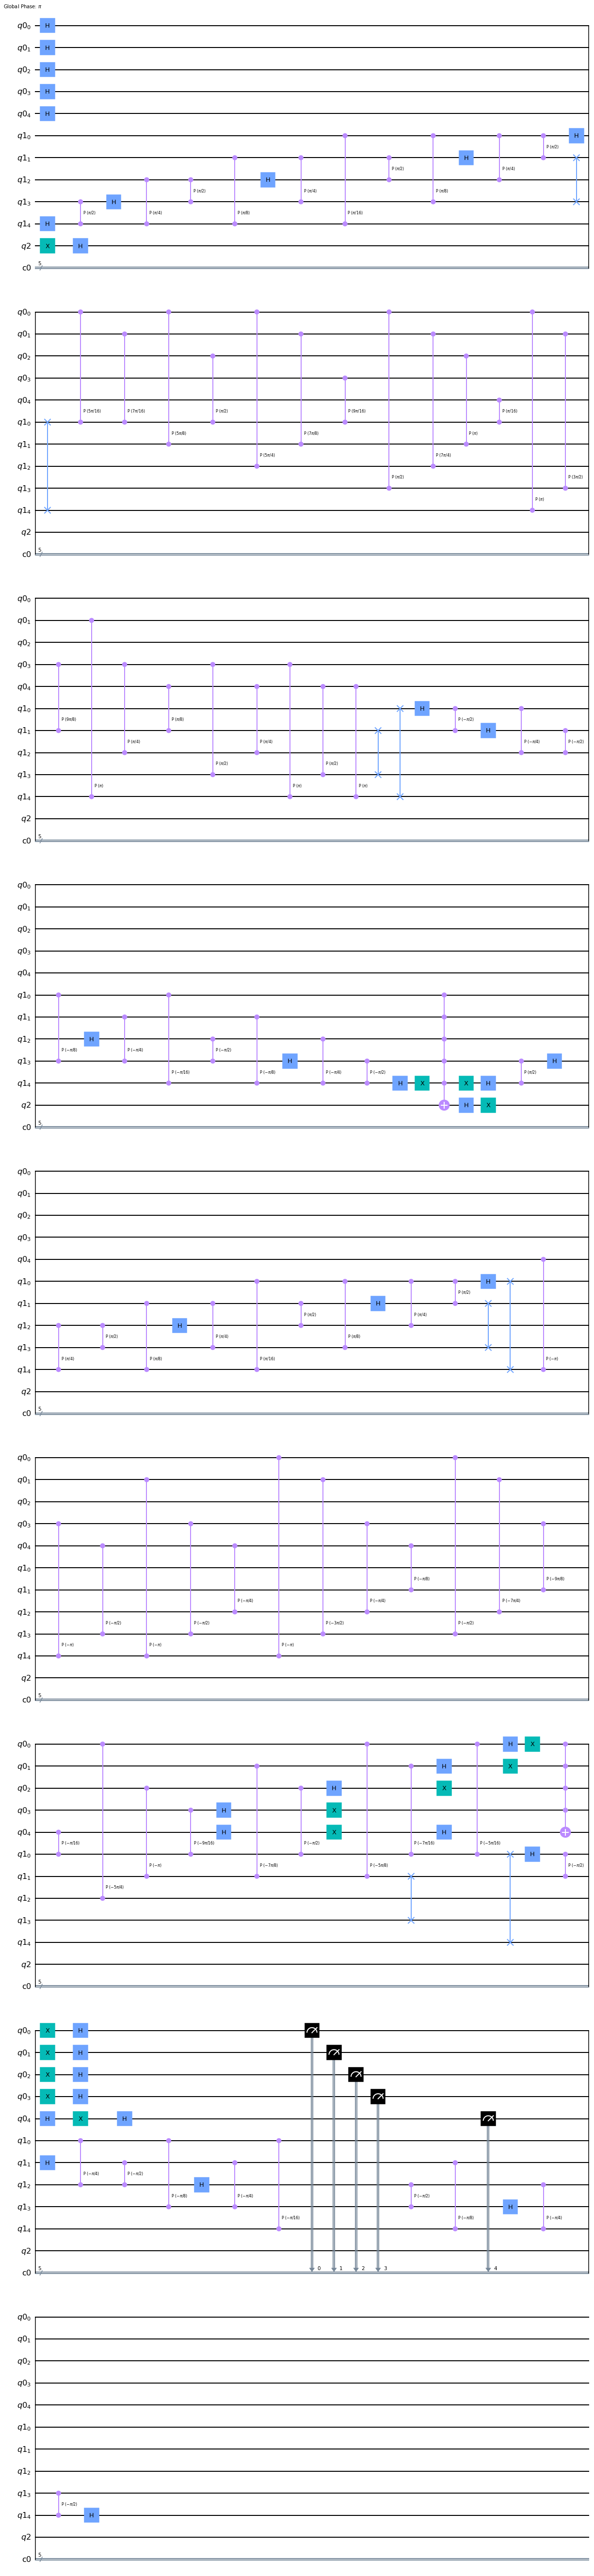

In [5]:
circ.draw("mpl")

In [6]:
ionq_simulator_backend = provider.get_backend("ionq.simulator")

In [7]:
job = ionq_simulator_backend.run(circ, shots=100)
print("Job id:", job.id())

Job id: 6d799958-b87b-11ec-86a7-9843fa02ff35


In [8]:
job_monitor(job)

Job Status: job has successfully run


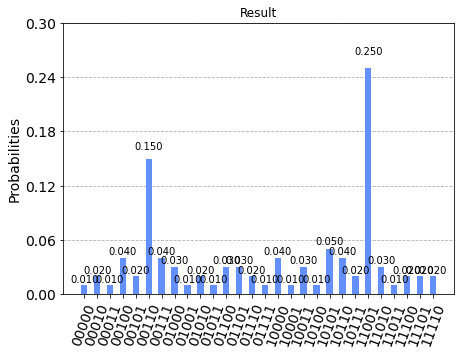

In [9]:
result = job.result()
plot_histogram(result.get_counts(circ), title="Result")

As you can see, the probabilities of obtaining the feasible sets have gone up. The optimal number of Grover iterations is $[{\frac{\pi}{4}\sqrt{\frac{N}{M}}}]$, where $N$ is the size of our search space, and $M$ is the number of feasible solutions. For our instance, this evaluates to 3 iterations.

In [10]:
circ = SubsetSumSolver(15, [5, 7, 8, 9, 1], 3, I, V, A, R)

In [11]:
job = ionq_simulator_backend.run(circ, shots=100)
print("Job id:", job.id())

Job id: 9f9fcfa6-b87b-11ec-86a7-9843fa02ff35


In [12]:
job_monitor(job)

Job Status: job has successfully run


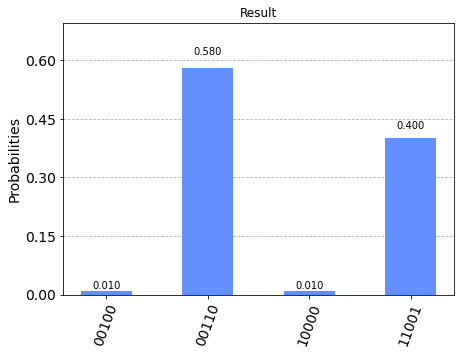

In [13]:
result = job.result()
plot_histogram(result.get_counts(circ), title="Result")

The probabilities are split almost evenly between the two subsets. Performing more Grover iterations reduces the probabilities of feasible sets.

In [14]:
circ = SubsetSumSolver(15, [5, 7, 8, 9, 1], 5, I, V, A, R)

In [15]:
job = ionq_simulator_backend.run(circ, shots=100)
print("Job id:", job.id())

Job id: cf9953a8-b87b-11ec-86a7-9843fa02ff35


In [16]:
job_monitor(job)

Job Status: job has successfully run


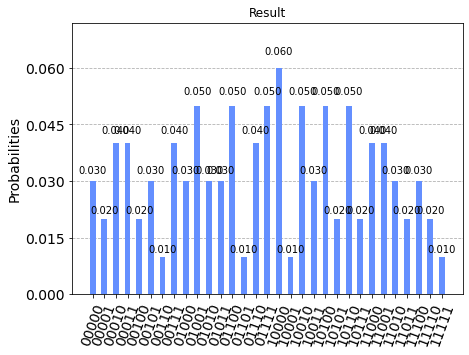

In [17]:
result = job.result()
plot_histogram(result.get_counts(circ), title="Result")

Granted, to know the optimal number of iterations, we must have a good estimate of the number of solutions to the search problem. One way to estimate it is using quantum phase estimation on the constructed Grover operator. However that is out of the scope of this mini-project.